# Designing Efficient Loops

- What exactly is an iterator?
    - An iterator is an object that defints __next__()
    - Iteration stops with the StopIteration exception

In [24]:
# Raw iterator example:
it = iter("Dog")
print(it.__next__())
print(it.__next__())
print(it.__next__())

# If we try to go past the maximum object (4th letter), we get the StopIteration exception:
print(it.__next__())

D
o
g


StopIteration: 

### Using the "sorted()" function on iterators:
- Built in Python func that returns a sorted list of the specified iterable object
- By default, strings are sorted alphabetically, and numbers are sorted numerically.
- The parameters include:
    - **iterable**: Required. The sequence to sort, list, dictionary, tuple etc.
    - **key**: Optional. A Function to execute to decide the order. Default is None
    - **reverse**: Optional. A Boolean. False will sort ascending, True will sort descending. Default is False
- Reference: https://www.w3schools.com/python/ref_func_sorted.asp

In [26]:
# Sorted() function examples with "cities" list iterable:
cities = ["Dallas", "Berlin", "London", "Los Angeles", "San Diego", "Athens", "Paris"]

In [27]:
# Pass the len() function as the key parameter to sort the cities by string length
for city in sorted(cities, key=len): print(city)

Paris
Dallas
Berlin
London
Athens
San Diego
Los Angeles


In [29]:
# Sort cities alphabetically (default)
for city in sorted(cities): print(city)

Athens
Berlin
Dallas
London
Los Angeles
Paris
San Diego


### Built-in Itertools Module:
- 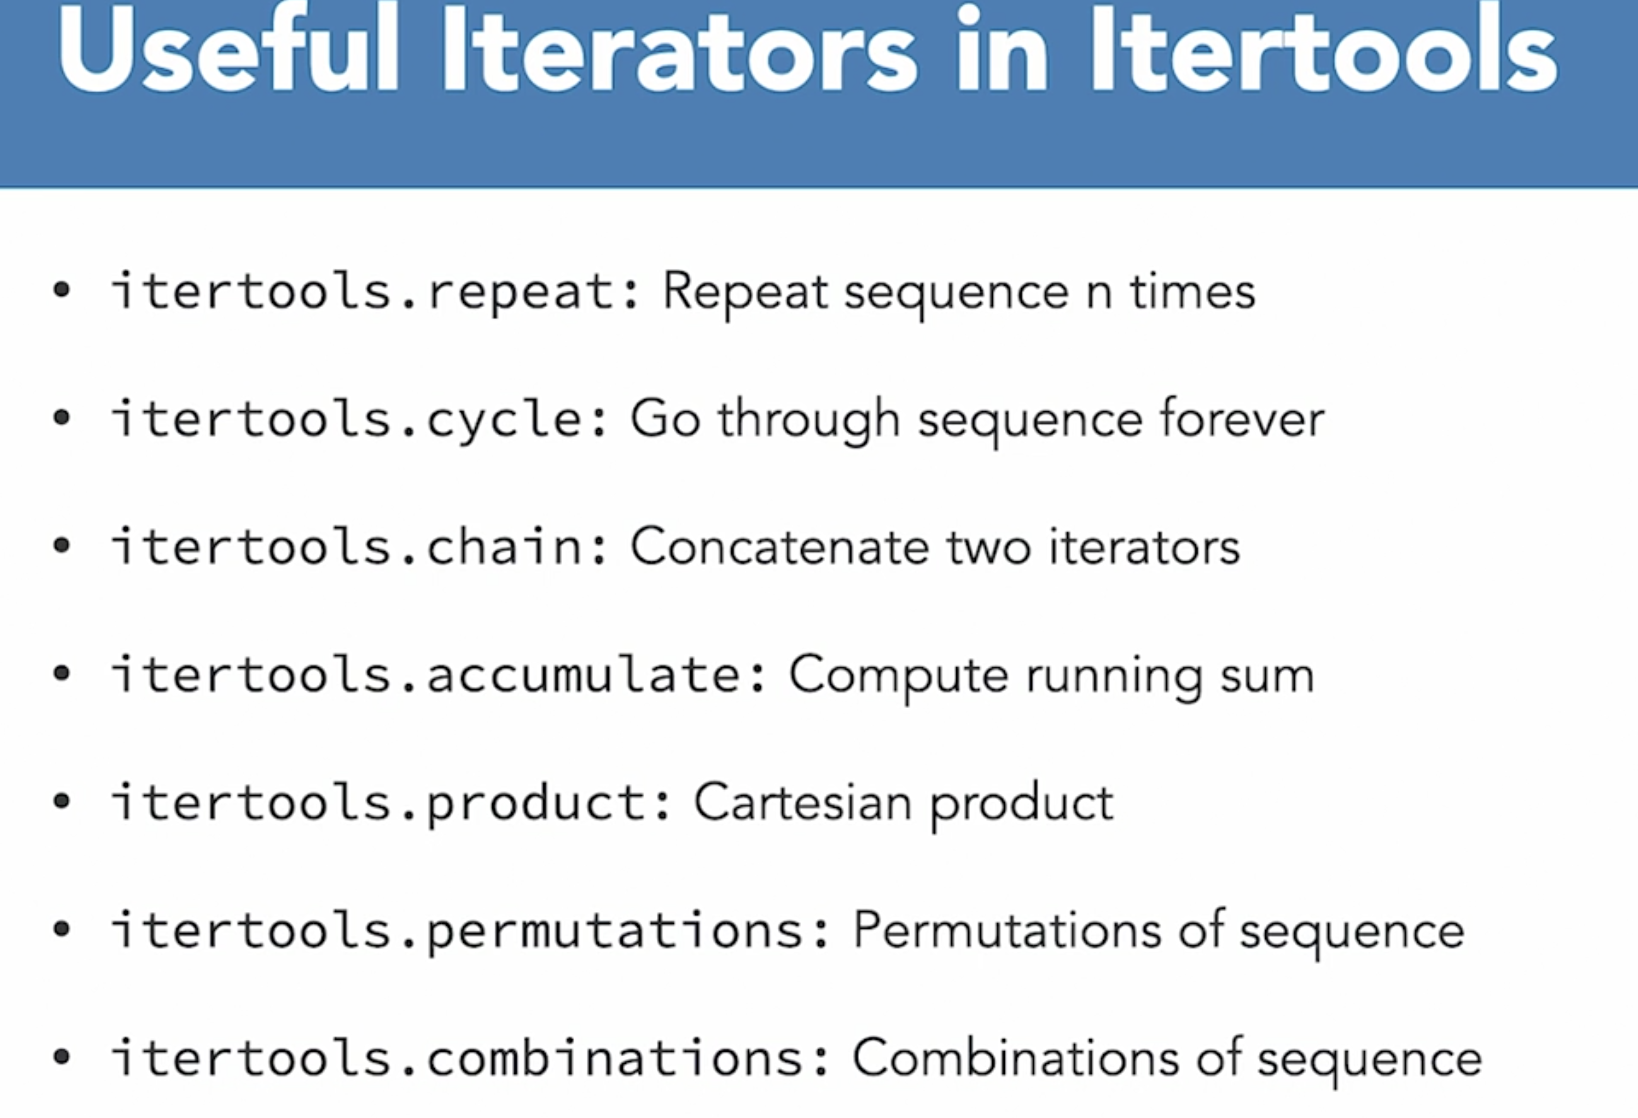

# Generator Functions

- Using generators saves memory and time in Python code
- Generators include the special operator "yield"

In [32]:
# Generator example (While this function could easily be written more efficiently, it is just an example):
# This generator does not need a terminating clause
def even_integers_generator(n: int):
    for i in range(n):
        if i % 2 == 0:
            yield i

In [39]:
# Self terminating generator:
def fibonacci(fmax: int):
    f1, f2 = 0, 1
    
    while True:
        yield f2
        
        f1, f2 = f2, f1 + f2
        
        # Terminator clause (very important)
        if f2 > fmax:
            return

In [41]:
for x in fibonacci(100): print(x)

1
1
2
3
5
8
13
21
34
55
89


<br>

# Exploiting Python Collections

- This built in library offers specialized iterable objects

In [66]:
import collections

### The collections "namedtuple" object:

In [47]:
# Create a collections namedtuple object called "Medal" that stores data about an Olympic sport event's medal winner
Medal = collections.namedtuple('Medal', ['year', 'athlete', 'team', 'event'])

In [50]:
# Create an instance of the Medal namedtuple object
# To do this we must pass the tuple parameters in order:
m = Medal('1896', 'Thomas Burke', 'USA', '100m men')
m

Medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men')

In [51]:
m.year, m.athlete

('1896', 'Thomas Burke')

In [72]:
# Create a list of Medal objects for each event in the goldmedals.txt file:

# Map all event datasets to a list from the goldmedals.txt file:
with open("goldmedals.txt", 'r') as events_file:
    events = [[event_data for event_data in line.strip().split("\t")] for line in events_file.readlines()]

# Print the first 10 events to show the format:
events[:10]

[['1896', 'Thomas Burke', 'USA', '100m men'],
 ['1896', 'Thomas Curtis', 'USA', '110m hurdles men'],
 ['1896', 'Edwin Flack', 'AUS', '1500m men'],
 ['1896', 'Thomas Burke', 'USA', '400m men'],
 ['1896', 'Edwin Flack', 'AUS', '800m men'],
 ['1896', 'Robert Garrett', 'USA', 'discus throw men'],
 ['1896', 'Ellery Clark', 'USA', 'high jump men'],
 ['1896', 'Ellery Clark', 'USA', 'long jump men'],
 ['1896', 'Spyridon Louis', 'GRE', 'marathon men'],
 ['1896', 'William Welles Hoyt', 'USA', 'pole vault men']]

In [75]:
# Now we can map the event data to the Medals nametuple objects by unpacking each event into the Medal class parameters
medals = [Medal(*event) for event in events]

# Print the first 10 medals to show the format:
medals[:10]

[Medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men'),
 Medal(year='1896', athlete='Thomas Curtis', team='USA', event='110m hurdles men'),
 Medal(year='1896', athlete='Edwin Flack', team='AUS', event='1500m men'),
 Medal(year='1896', athlete='Thomas Burke', team='USA', event='400m men'),
 Medal(year='1896', athlete='Edwin Flack', team='AUS', event='800m men'),
 Medal(year='1896', athlete='Robert Garrett', team='USA', event='discus throw men'),
 Medal(year='1896', athlete='Ellery Clark', team='USA', event='high jump men'),
 Medal(year='1896', athlete='Ellery Clark', team='USA', event='long jump men'),
 Medal(year='1896', athlete='Spyridon Louis', team='GRE', event='marathon men'),
 Medal(year='1896', athlete='William Welles Hoyt', team='USA', event='pole vault men')]

### The collections "Counter" object:

In [82]:
# Using the Counter object we can fetch the frequency of each team by Medal:
teams = collections.Counter(medal.team for medal in medals)

# View the created Counter object:
teams

Counter({'USA': 521,
         'AUS': 23,
         'GRE': 7,
         'GBR': 71,
         'CAN': 21,
         'ZZX': 5,
         'HUN': 10,
         'FRA': 14,
         'RSA': 8,
         'SWE': 21,
         'FIN': 60,
         'NOR': 7,
         'ITA': 19,
         'GER': 18,
         'POL': 27,
         'IRL': 4,
         'JPN': 7,
         'ARG': 2,
         'NZL': 10,
         'TCH': 11,
         'NED': 9,
         'JAM': 42,
         'BEL': 4,
         'AUT': 1,
         'LUX': 1,
         'URS': 79,
         'BRA': 5,
         'EUA': 7,
         'ROU': 11,
         'ETH': 22,
         'KEN': 33,
         'TUN': 1,
         'GDR': 50,
         'FRG': 15,
         'UGA': 2,
         'TRI': 2,
         'MEX': 3,
         'CUB': 10,
         'BUL': 5,
         'MAR': 6,
         'POR': 4,
         'CHN': 8,
         'ESP': 3,
         'ALG': 4,
         'EUN': 12,
         'LTU': 3,
         'KOR': 1,
         'RUS': 29,
         'ECU': 1,
         'BDI': 1,
         'SYR': 1,
       

In [83]:
# Get the 5 most common teams from our teams Counter() object:
teams.most_common(5)

[('USA', 521), ('URS', 79), ('GBR', 71), ('FIN', 60), ('GDR', 50)]

### The collections "defaultdict" object:
- The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict **_never raises a KeyError_**. It provides a default value for the key that does not exist.
- If a key is attempted to be accessed and doesn't yet exist, the defaultdict object will create the key with the passed "default_factory" parameter as the default value.

In [110]:
# Get a list of the medal winner's names by country:

# We create a new defaultdict object and pass "list" as the default_factory parameter
winners_by_country = collections.defaultdict(list)
winners_by_country

defaultdict(list, {})

In [111]:
# Map the data:
for medal in medals:
    winners_by_country[medal.team].append(medal.athlete)
    
# Using our constructed defaultdict object, we can fetch winners from Japan (JPN) countries:
winners_by_country['JPN']

['Mikio Oda',
 'Chuhei Nambu',
 'Kitei Son',
 'Naoto Tajima',
 'Naoko Takahashi',
 'Koji Murofushi',
 'Mizuki Noguchi']

In [112]:
# If we try to do this same operation with a default dictionary, it will not work and raise a KeyError:
w_b_c = dict()
for medal in medals:
    w_b_c[medal.team].append(medal.athlete)

KeyError: 'USA'

### The collections "deque" object:
- Implements a double ended queue, where we can append and pop on either side of the object

In [124]:
# Create a deque of integers from 1-10
dq = collections.deque(range(1,11))
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [125]:
# Deque operations example:
for i in range(11, 16):
    dq.append(i)
    pop_val = dq.popleft()
    
    print("Inserted:", i, "- popped:", pop_val, "- result:", dq)

Inserted: 11 - popped: 1 - result: deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
Inserted: 12 - popped: 2 - result: deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
Inserted: 13 - popped: 3 - result: deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
Inserted: 14 - popped: 4 - result: deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
Inserted: 15 - popped: 5 - result: deque([6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


<br>

# Writing Pythonic Code
- Instructor states that "Pythonic code is code that embodies the design principles of the language, the most efficient and readable way to solve the problem"